In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../..")

from tools.curbd import curbd, curbd_gpu, curbd_gpu_v2
import numpy as np
import pylab
import cupy as cp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


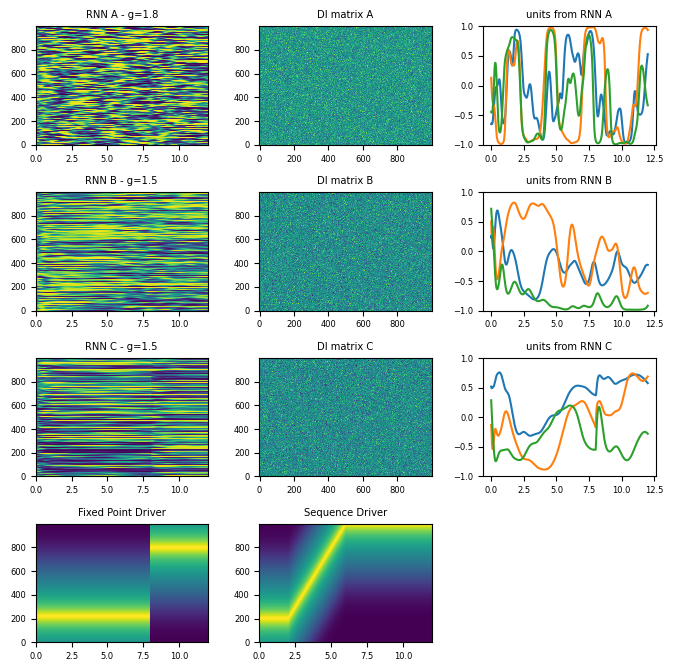

In [63]:
sim_1000 = curbd.threeRegionSim(number_units=1000, plotSim=True, T=10)

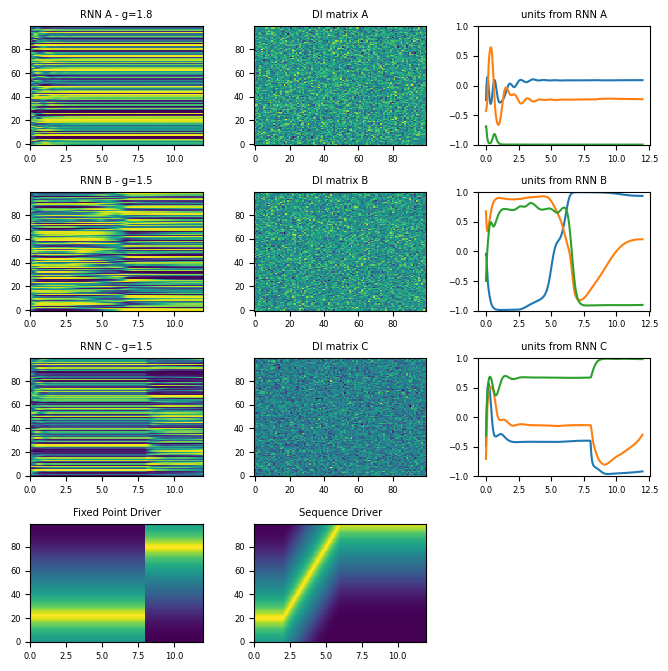

In [21]:
sim = curbd.threeRegionSim(number_units=100, plotSim=True, T=10)

In [9]:
# Stack neurons
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity.shape

(300, 1201)

In [ ]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=5,
                                  verbose=True,
                                  nRunFree=5,
                                  plotStatus=False)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [25]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

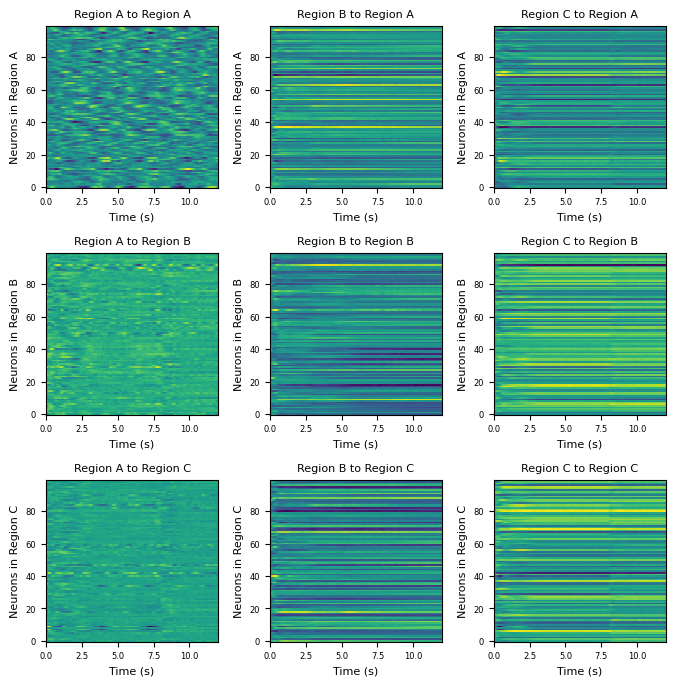

In [26]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'], range(n_region_units),
                       curbd_arr[iTarget, iSource])
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()

In [69]:
activity.shape

(3000, 1201)

In [ ]:
Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


model = curbd_gpu.trainMultiRegionRNN(activity,
                                  dtData=sim['params']['dtData'],
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*sim['params']['tau']/2,
                                  nRunTrain=100,
                                  verbose=True,
                                  nRunFree=5,
                                  plotStatus=False)


[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

In [32]:
curbd_arr.shape

(3, 3)

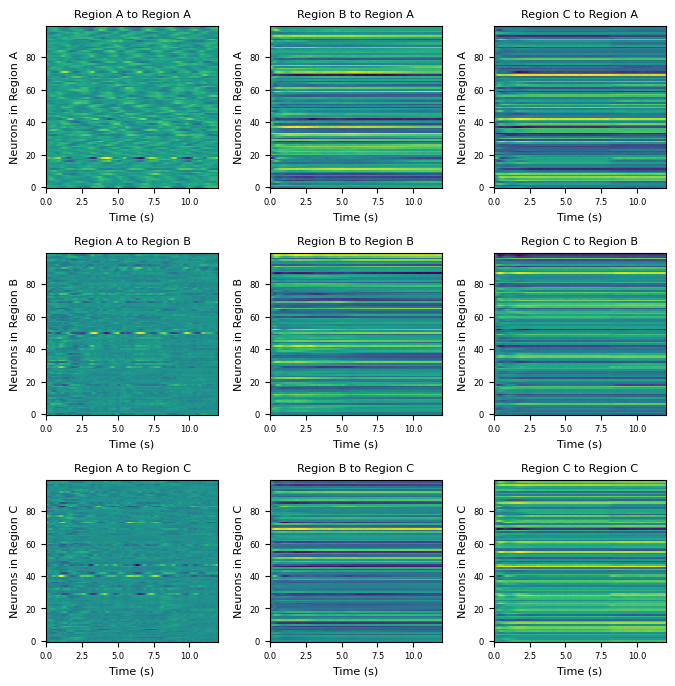

In [33]:
n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'].get(), range(n_region_units),
                       curbd_arr[iTarget, iSource].get())
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()

## Testing out own CURBD

In [22]:
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity = activity[np.newaxis, :, :]
activity.shape

(1, 300, 1201)

In [19]:
activity = np.concatenate((sim['Ra'], sim['Rb'], sim['Rc']), 0)  
activity = activity[np.newaxis, :, :]
# activity = np.concatenate((activity[np.newaxis, :, :], activity[np.newaxis, :, :]))


Na = sim['params']['Na']
Nb = sim['params']['Nb']
Nc = sim['params']['Nc']

regions = []
regions.append(['Region A', np.arange(0, Na)])
regions.append(['Region B', np.arange(Na, Na + Nb)])
regions.append(['Region C', np.arange(Na + Nb, Na + Nb + Nc)])
regions = np.array(regions, dtype=object)


gcurbd = curbd_gpu_v2.gCURBD(
    dt_data=sim['params']['dtData'],
    dt_factor=5,
    regions=regions,
    train_epochs=100
)


gcurbd.fit(activity)


trial=0 pVar=nan chi2=nan
trial=1 pVar=nan chi2=nan


KeyboardInterrupt: 

In [142]:
# Stack neurons
activity = np.concatenate((sim_1000['Ra'], sim_1000['Rb'], sim_1000['Rc']), 0)  

model = curbd.trainMultiRegionRNN(
    activity,
    dtData=sim['params']['dtData'],
    dtFactor=5,
    regions=regions,
    tauRNN=2*sim['params']['tau']/2,
    nRunTrain=100,
    verbose=True,
    nRunFree=5,
    plotStatus=False
)

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Example array
arr = np.array([49.44479908])

# Get the value
value = arr[0]

print(value)
